In [1]:
import os
import senepy as sp
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random 

random.seed(42)

# Set working directory
os.chdir('/fs/scratch/PAS2598/Morales/CSF_workspace/csf')

# Check current working directory
print(os.getcwd())

/users/PAS2598/jmorales558/.conda/envs/senepy/lib/python3.9/site-packages/senepy/load_hubs.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename
/users/PAS2598/jmorales558/.local/lib/python3.9/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/users/PAS2598/jmorales558/.local/lib/python3.9/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/users/PAS2598/jmorales558/.local/lib/python3.9/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_

/fs/scratch/PAS2598/Morales/CSF_workspace/csf


In [2]:
hubs = sp.load_hubs(species = 'Human') 
hubs.metadata

,tissue,cell,hub_num,size,n_sen,hyp
0,blood,memory b cell,1,418,4,4.474175e-01
1,blood,monocyte,1,111,3,6.302843e-02
2,blood,monocyte,2,57,9,8.624843e-10
3,blood,naive b cell,0,167,1,7.478063e-01
4,blood,naive b cell,1,62,4,1.671133e-03
...,...,...,...,...,...,...
59,skin,immune cell,0,853,22,1.979113e-06
60,skin,mitotic cell,0,2126,23,1.011616e-01
61,skin,spinous cell,0,2029,13,8.574694e-01
62,skin,spinous cell,1,619,19,8.362009e-07


In [3]:
#hubs.literature_markers

In [4]:
#hubs.senGPT

In [5]:
#hubs.search_hubs_by_genes(['Cdkn2a', 'Cdkn1a', 'Il6', 'Cxcl13'])

In [6]:
#hubs.search_hubs_by_genes(hubs.senGPT)

In [7]:
#pDC_hub = hubs.metadata[(hubs.metadata.tissue == 'blood')]
#pDC_hub
#hubs.merge_hubs(pDC_hub, new_name = 'blood_pDC')


#myeloid_hub = hubs.metadata[(hubs.metadata.tissue == 'blood') & 
#                         (hubs.metadata.cell.str.contains('monocyte|neutrophil', case=False))]
#myeloid_hub
#hubs.merge_hubs(myeloid_hub, new_name = 'blood_myeloid')


#tcell_hub = hubs.metadata[(hubs.metadata.tissue == 'blood') & 
#                         (hubs.metadata.cell.str.contains('t cell', case=False))]
#tcell_hub
#hubs.merge_hubs(tcell_hub, new_name = 'blood_tcell')

#nk_hub = hubs.metadata[(hubs.metadata.tissue == 'blood') & 
#                         (hubs.metadata.cell.str.contains('nk cell', case=False))]
#nk_hub
#hubs.merge_hubs(nk_hub, new_name = 'blood_nk')

#bcell_hub = hubs.metadata[(hubs.metadata.tissue == 'blood') & 
#                         (hubs.metadata.cell.str.contains('memory b cell|naive b cell', case=False))]
#bcell_hub
#hubs.merge_hubs(bcell_hub, new_name = 'blood_b')

In [8]:
blood_hub = hubs.metadata[(hubs.metadata.tissue == 'blood')]
blood_hub
hubs.merge_hubs(blood_hub, new_name = 'blood')

In [9]:
#hubs.hubs['blood'][:10]

In [10]:
#hubs.hubs['blood_pDC'][:10]

In [11]:
#hubs.hubs['blood_myeloid'][:10]

In [12]:
#hubs.hubs['blood_tcell'][:10]

In [13]:
#hubs.hubs['blood_nk'][:10]

In [14]:
#hubs.hubs['blood_b'][:10]

In [15]:
# Load your h5ad file
adata = sc.read_h5ad('adata_with_raw_age_filtered.h5ad')

# Check what you loaded
print(adata)
print(f"Number of cells: {adata.n_obs}")
print(f"Number of genes: {adata.n_vars}")

# View the metadata (equivalent to @meta.data in R)
print(adata.obs.head())

AnnData object with n_obs × n_vars = 403973 × 12215
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mito', 'percent.mito_log10', 'nCount_RNA_log10', 'nFeature_RNA_log10', 'nCount_RNA_log2', 'nFeature_RNA_log2', 'scaled_mito', 'scaled_nCount_RNA', 'sample', 'study', 'sex', 'organ', 'disease', 'dataset', 'disease_group', 'batch', 'cell_type', 'disease_group_comb', 'age', 'age_comparison'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'cell_type_colors', 'hvg', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'
Number of cells: 403973
Number of genes: 12215
   nCount_RNA  nFeature_RNA  percent.mito  percent.mito_log10  \
0      3107.0          1571      0.136466            0.055556   
1      4760.0          2117      0.090756            0.037728   
2      3205.0          1570      0

/users/PAS2598/jmorales558/.local/lib/python3.9/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [16]:
adata.obs

,nCount_RNA,nFeature_RNA,percent.mito,percent.mito_log10,nCount_RNA_log10,nFeature_RNA_log10,nCount_RNA_log2,nFeature_RNA_log2,scaled_mito,scaled_nCount_RNA,...,sex,organ,disease,dataset,disease_group,batch,cell_type,disease_group_comb,age,age_comparison
0,3107.0,1571,0.136466,0.055556,3.492481,3.196453,11.601771,10.618386,0.258604,0.872348,...,M,PBMC,HIV,GSE117397,infectious,0,NK cells,infectious,51.0,exclude
1,4760.0,2117,0.090756,0.037728,3.677698,3.325926,12.217049,11.048487,-0.341264,1.368786,...,M,PBMC,HIV,GSE117397,infectious,0,NK cells,infectious,51.0,exclude
2,3205.0,1570,0.093916,0.038984,3.505964,3.196176,11.646559,10.617467,-0.299801,0.908485,...,M,PBMC,HIV,GSE117397,infectious,0,NK cells,infectious,51.0,exclude
3,3820.0,1726,0.157068,0.063359,3.582177,3.237292,11.899735,10.754052,0.528972,1.112760,...,M,PBMC,HIV,GSE117397,infectious,0,NK cells,infectious,51.0,exclude
4,3577.0,1848,0.085267,0.035537,3.553640,3.266937,11.804938,10.852530,-0.413302,1.036273,...,M,PBMC,HIV,GSE117397,infectious,0,NK cells,infectious,51.0,exclude
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403968,2753.0,1065,0.078460,0.032804,3.439964,3.027757,11.427313,10.057992,0.248443,0.146724,...,M,PBMC,HC,dbgap,control,1,γδ T cells,control,37.0,exclude
403969,3226.0,1330,0.045567,0.019352,3.508799,3.124178,11.655978,10.378295,-0.685175,0.483329,...,M,PBMC,HC,dbgap,control,1,γδ T cells,control,37.0,exclude
403970,2638.0,978,0.088324,0.036758,3.421439,2.990783,11.365776,9.935165,0.528438,0.056139,...,M,PBMC,HC,dbgap,control,1,γδ T cells,control,37.0,exclude
403971,3389.0,1095,0.104161,0.043032,3.530200,3.039811,11.727070,10.098032,0.977925,0.587979,...,M,PBMC,HC,dbgap,control,1,γδ T cells,control,37.0,exclude


In [17]:
# Subset samples with "control" in the disease_group column
cd8 = adata[(adata.obs['cell_type'] == 'CD8 T cells')].copy()

old = cd8[(cd8.obs['organ'] == 'CSF') & 
                    (cd8.obs['disease_group'] == 'control') &
                    (cd8.obs['age_comparison'] == '≥60 years')].copy()

young = cd8[(cd8.obs['organ'] == 'CSF') & 
                    (cd8.obs['disease_group'] == 'control') &
                    (cd8.obs['age_comparison'] == '≤25 years')].copy()

adata_cd8_coy = old.concatenate(young)

/tmp/slurmtmp.1906733/ipykernel_740747/2409204471.py:12: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata_cd8_coy = old.concatenate(young)


In [18]:
translator = sp.translator(hub = hubs.hubs[('blood')], data = adata_cd8_coy)

203 of 1918 genes not initially present
5 of 203 translated
198 still not present


In [19]:
#score_hub returns a list and we can save this directly to the adata.obs dataframe

# CD4_subset = adata[adata.obs['cell_type'] == 'CD4 T cells'].copy()

adata_cd8_coy.obs['sen_score'] = sp.score_all_cells(adata_cd8_coy, hubs.hubs[('blood')], 
                                     identifiers = ['sex', 'age_comparison'])

  0%|          | 0/3 [00:00<?, ?it/s]

1715/1918(89.42%) genes present in data
###################
Not present: ['HIST2H2BE', 'HBG2', 'TRBC1', 'BEND4', 'LCN2', 'SELENBP1', 'HRK', 'PF4', 'HIST1H2AG', 'LACTB2-AS1', 'WARS', 'MPP5', 'HIST1H2AH', 'ARHGAP42', 'UBA6-AS1', 'LTF', 'GATB', 'AC147651.4', 'FAM122C', 'WASIR2', 'TRMO', 'OLFM4', 'NEMP1', 'IGHGP', 'HIST1H1B', 'HIST2H2BF', 'CAMP', 'TUBB1', 'GP9', 'HIST1H2BG', 'ITGB3', 'AC015987.1', 'MINCR', 'CALD1', 'PGLYRP1', 'PTPRG', 'HIST1H2AE', 'ANGPTL1', 'ZSCAN26', 'HBQ1', 'STEAP1B', 'HIST1H2BE', 'HIST1H2BF', 'IGHV3-7', 'OSTN-AS1', 'KIAA1324L', 'CMTM5', 'AC144652.1', 'MTERF1', 'ANKRD33B', 'CFAP44', 'JAML', 'ATRIP', 'GP1BA', 'LINC00570', 'TMEM158', 'CAV2', 'MFAP3L', 'BEND2', 'CXCL5', 'HIST1H2BC', 'PDZK1IP1', 'RUNDC3A', 'PBX1', 'PF4V1', 'TGFB1I1', 'IFIT1B', 'TMEM40', 'ELOVL7', 'WASF3', 'EPB42', 'SPTB', 'EGF', 'CLEC1B', 'BBOF1', 'FSTL1', 'SLC4A1', 'LTBP1', 'CTTN', 'XK', 'TSPAN9', 'AC147651.1', 'PKHD1L1', 'AQP10', 'SERPINB2', 'MMP8', 'CA4', 'ABCA13', 'ADGRG3', 'CD24', 'ORM1', 'ANXA3', 'DEF

100%|██████████| 3/3 [00:04<00:00,  1.64s/it]


In [20]:
adata_cd8_coy.obs.head()

,nCount_RNA,nFeature_RNA,percent.mito,percent.mito_log10,nCount_RNA_log10,nFeature_RNA_log10,nCount_RNA_log2,nFeature_RNA_log2,scaled_mito,scaled_nCount_RNA,...,organ,disease,dataset,disease_group,batch,cell_type,disease_group_comb,age,age_comparison,sen_score
319537-0,2136299.0,4535,0.044652,0.018972,6.329662,3.656673,21.026683,12.147205,-0.388890,0.609297,...,CSF,HCTW,GSE127969,control,0,CD8 T cells,control,69.0,≥60 years,-0.000838
319595-0,2704.0,1205,0.056583,0.023904,3.432167,3.081347,11.401413,10.236014,-0.150247,-0.013720,...,CSF,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.062138
319596-0,2858.0,890,0.053534,0.022649,3.456214,2.949878,11.481295,9.799282,-0.222454,0.103733,...,CSF,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.063529
319597-0,2420.0,1145,0.058264,0.024594,3.383995,3.059185,11.241387,10.162391,-0.110421,-0.249011,...,CSF,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.039895
319598-0,1788.0,758,0.067114,0.028211,3.252610,2.880242,10.804938,9.567956,0.099164,-0.890739,...,CSF,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.093783


In [21]:
young = adata_cd8_coy[adata_cd8_coy.obs['age_comparison'] == '≤25 years'].copy()

In [22]:
e = young.obs.sen_score.mean() #distribution mean

In [23]:
std = young.obs.sen_score.std() #distribution std

In [24]:
thresh = e + 3*std
thresh

np.float64(-0.021401207856391984)

In [25]:
#function to add senescent label
def is_putative_sen(x):
    if x >= thresh:
        return 1
    else:
        return 0

In [26]:
#map function to a new row in adata.obs
adata_cd8_coy.obs['putative_sen'] = adata_cd8_coy.obs.sen_score.map(is_putative_sen)

In [27]:
adata_cd8_coy.obs.head()

,nCount_RNA,nFeature_RNA,percent.mito,percent.mito_log10,nCount_RNA_log10,nFeature_RNA_log10,nCount_RNA_log2,nFeature_RNA_log2,scaled_mito,scaled_nCount_RNA,...,disease,dataset,disease_group,batch,cell_type,disease_group_comb,age,age_comparison,sen_score,putative_sen
319537-0,2136299.0,4535,0.044652,0.018972,6.329662,3.656673,21.026683,12.147205,-0.388890,0.609297,...,HCTW,GSE127969,control,0,CD8 T cells,control,69.0,≥60 years,-0.000838,1
319595-0,2704.0,1205,0.056583,0.023904,3.432167,3.081347,11.401413,10.236014,-0.150247,-0.013720,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.062138,0
319596-0,2858.0,890,0.053534,0.022649,3.456214,2.949878,11.481295,9.799282,-0.222454,0.103733,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.063529,0
319597-0,2420.0,1145,0.058264,0.024594,3.383995,3.059185,11.241387,10.162391,-0.110421,-0.249011,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.039895,0
319598-0,1788.0,758,0.067114,0.028211,3.252610,2.880242,10.804938,9.567956,0.099164,-0.890739,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.093783,0


/tmp/slurmtmp.1906733/ipykernel_740747/2886739328.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  senescence_by_group_cell = comparison_data.groupby(['cell_type', 'age_comparison'])['putative_sen'].agg(['mean', 'count', 'std']).reset_index()


cd8 senescence by cell type and age group:
     cell_type age_comparison      mean  count       std  percent_senescent  \
0  CD8 T cells      ≤25 years  0.010475   4964  0.101822           1.047542   
1  CD8 T cells      ≥60 years  0.027431   3682  0.163357           2.743074   

        sem  
0  0.144520  
1  0.269213  


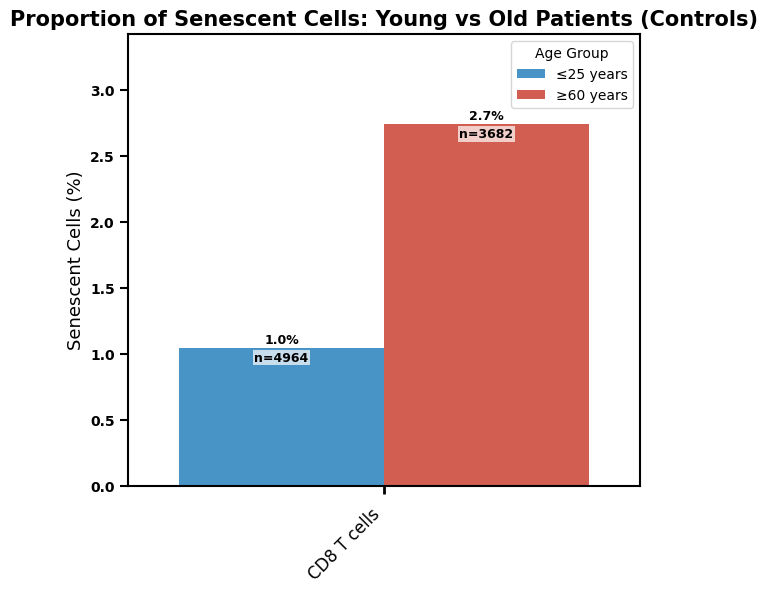

In [28]:
# Filter to only include the two groups of interest
comparison_data = adata_cd8_coy.obs[adata_cd8_coy.obs['age_comparison'] != 'exclude']

# Calculate senescence percentages grouped by BOTH cell type AND age group
senescence_by_group_cell = comparison_data.groupby(['cell_type', 'age_comparison'])['putative_sen'].agg(['mean', 'count', 'std']).reset_index()
senescence_by_group_cell['percent_senescent'] = senescence_by_group_cell['mean'] * 100
senescence_by_group_cell['sem'] = (senescence_by_group_cell['std'] / np.sqrt(senescence_by_group_cell['count'])) * 100

# Print summary statistics
print("cd8 senescence by cell type and age group:")
print(senescence_by_group_cell)


# Create the grouped bar plot
plt.figure(figsize=(6, 6))

# Create a grouped bar plot
ax = sns.barplot(
    data=senescence_by_group_cell,
    #x='cell_type',
    y='percent_senescent',
    hue='age_comparison',
    palette={'≤25 years': '#3498DB', '≥60 years': '#E74C3C'},
    errorbar=('ci', 95),
    capsize=0.1
)

# Create a dictionary to store the x positions of bars for each cell type and age group
bar_positions = {}
cell_types = senescence_by_group_cell['cell_type'].unique()
num_cell_types = len(cell_types)

# Get the bar positions 
for i, cell_type in enumerate(cell_types):
    bar_positions[cell_type] = {}
    bar_positions[cell_type]['≤25 years'] = i - 0.2  # Position for young group
    bar_positions[cell_type]['≥60 years'] = i + 0.2   # Position for old group

# Add sample sizes and percentages
for _, row in senescence_by_group_cell.iterrows():
    cell_type = row['cell_type']
    age_group = row['age_comparison']
    count = row['count']
    percent = row['percent_senescent']
    
    # Calculate position
    x_pos = bar_positions[cell_type][age_group]
    
    # Determine y position for sample size - make it relative to bar height
    y_offset = 1.0  # Fixed offset above bar
    if percent > 5:  # For very short bars
        y_pos = percent + y_offset
    else:
        # For taller bars, place within the bar
        y_pos = percent - 0.075
        # But ensure it's visible (not below bar)
        #if y_pos < 1:
        #    y_pos = percent + 0.1
    
    # For extremely tall bars like the myeloid cells
    if percent > 20:
        y_pos = percent - 2
    
    # Add sample size
    plt.text(
        x_pos, 
        y_pos,
        f'n={count}',
        ha='center',
        va='center',
        fontsize=9,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )
    
    # Add percentage to the top of each bar
    plt.text(
        x_pos,
        percent + 0.01,  # Position slightly above the bar
        f'{percent:.1f}%',  # Format to 1 decimal place
        ha='center',
        va='bottom',
        fontsize=9,
        fontweight='bold',
        color='black',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', pad=1)
    )

plt.title('Proportion of Senescent Cells: Young vs Old Patients (Controls)', fontsize=15, fontweight='bold')
plt.ylabel('Senescent Cells (%)', fontsize=13)
plt.yticks(fontsize=10, fontweight='bold')  # Rotate labels for better readability
plt.xlabel('CD8 T cells', fontsize=12, rotation=45, ha='right')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.legend(title='Age Group')
plt.tight_layout()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(axis='x', width=2, length=6)
ax.tick_params(axis='y', width=1.5, length=6)

# Increase y-limit to accommodate the percentage labels
max_percent = max(senescence_by_group_cell['percent_senescent'])
plt.ylim(0, max_percent * 1.25)  # Increased headroom for labels

# Save as TIFF (publication quality)
plt.savefig('senepy_cd8_controls_oldvsyoung_7-28-25.tiff', dpi=300, bbox_inches='tight')

plt.show()

In [36]:
adata_cd8_coy.obs.head()

,nCount_RNA,nFeature_RNA,percent.mito,percent.mito_log10,nCount_RNA_log10,nFeature_RNA_log10,nCount_RNA_log2,nFeature_RNA_log2,scaled_mito,scaled_nCount_RNA,...,disease,dataset,disease_group,batch,cell_type,disease_group_comb,age,age_comparison,sen_score,putative_sen
319537-0,2136299.0,4535,0.044652,0.018972,6.329662,3.656673,21.026683,12.147205,-0.388890,0.609297,...,HCTW,GSE127969,control,0,CD8 T cells,control,69.0,≥60 years,-0.000838,1
319595-0,2704.0,1205,0.056583,0.023904,3.432167,3.081347,11.401413,10.236014,-0.150247,-0.013720,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.062138,0
319596-0,2858.0,890,0.053534,0.022649,3.456214,2.949878,11.481295,9.799282,-0.222454,0.103733,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.063529,0
319597-0,2420.0,1145,0.058264,0.024594,3.383995,3.059185,11.241387,10.162391,-0.110421,-0.249011,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.039895,0
319598-0,1788.0,758,0.067114,0.028211,3.252610,2.880242,10.804938,9.567956,0.099164,-0.890739,...,HC,GSE141578,control,0,CD8 T cells,control,75.0,≥60 years,-0.093783,0


In [37]:
# Check your subset first
print("=== CD8 T CELL SUBSET ANALYSIS ===")
print(f"Shape: {adata_cd8_coy.shape}")
print(f"Available layers: {list(adata_cd8_coy.layers.keys())}")

# Check age group distribution
print(f"\nsene distribution:")
print(adata_cd8_coy.obs['putative_sen'].value_counts())

# Check samples per age group
print(f"\nSamples per sene:")
sample_counts = adata_cd8_coy.obs.groupby('putative_sen')['sample'].nunique()
print(sample_counts)

# Verify raw counts are still there
print(f"\nRaw counts layer max: {adata_cd8_coy.layers['raw_counts'].max():,.0f}")

# Create pseudobulk with this focused dataset
def create_pseudobulk_from_layer(adata, layer_name='raw_counts', sample_col='sample', condition_col='putative_sen'):
    """Create pseudobulk using raw counts layer"""
    
    count_matrix = adata.layers[layer_name]
    genes = adata.var_names
    
    print(f"Using layer '{layer_name}' with max value: {count_matrix.max():,.0f}")
    
    # Get sample info
    sample_info = adata.obs[[sample_col, condition_col]].drop_duplicates()
    print(f"Total samples: {len(sample_info)}")
    print(f"Samples by condition:")
    print(sample_info[condition_col].value_counts())
    
    # Create pseudobulk matrix
    pseudobulk_matrix = np.zeros((len(sample_info), len(genes)))
    
    for i, (_, sample_row) in enumerate(sample_info.iterrows()):
        sample_name = sample_row[sample_col]
        sample_cells = adata.obs[adata.obs[sample_col] == sample_name].index
        cell_indices = [list(adata.obs_names).index(cell) for cell in sample_cells]
        
        if len(cell_indices) > 0:
            pseudobulk_matrix[i, :] = count_matrix[cell_indices, :].sum(axis=0)
            
    pseudobulk_df = pd.DataFrame(
        pseudobulk_matrix.T,
        index=genes,
        columns=sample_info[sample_col].values
    )
    
    return pseudobulk_df, sample_info

# Run pseudobulk on your CD8 T cell subset
pseudobulk_cd8, sample_metadata_cd8 = create_pseudobulk_from_layer(adata_cd8_coy)

print(f"\nCD8 T CELL PSEUDOBULK RESULTS:")
print(f"Shape: {pseudobulk_cd8.shape}")
print(f"Max value: {pseudobulk_cd8.max().max():,.0f}")
print(f"Min value: {pseudobulk_cd8.min().min():,.0f}")

# Check senescence genes in this focused analysis
senescence_genes = ['CDKN1A', 'CDKN2A', 'GLB1', 'IL6R']
print(f"\nSenescence genes in CD8 T cells:")
for gene in senescence_genes:
    if gene in pseudobulk_cd8.index:
        values = pseudobulk_cd8.loc[gene].values
        non_zero_samples = (values > 0).sum()
        print(f"{gene}: max={values.max():,.0f}, mean={values.mean():,.1f}, expressed in {non_zero_samples}/{len(values)} samples")

=== CD8 T CELL SUBSET ANALYSIS ===
Shape: (8646, 12215)
Available layers: ['raw_counts']

sene distribution:
putative_sen
0    8493
1     153
Name: count, dtype: int64

Samples per sene:
putative_sen
0    27
1    24
Name: sample, dtype: int64

Raw counts layer max: 426,410
Using layer 'raw_counts' with max value: 426,410
Total samples: 51
Samples by condition:
putative_sen
0    27
1    24
Name: count, dtype: int64

CD8 T CELL PSEUDOBULK RESULTS:
Shape: (12215, 51)
Max value: 3,464,746
Min value: 0

Senescence genes in CD8 T cells:
CDKN1A: max=755, mean=33.0, expressed in 42/51 samples
CDKN2A: max=984, mean=78.0, expressed in 34/51 samples
GLB1: max=6,394, mean=266.5, expressed in 49/51 samples
IL6R: max=4,760, mean=192.6, expressed in 43/51 samples


In [39]:
# Step 1: Filter and normalize your excellent pseudobulk data
print("=== FILTERING AND NORMALIZATION ===")

# Filter: >3 counts in at least 30% of samples (your approach)
min_counts = 3
min_samples = int(0.3 * len(pseudobulk_cd8.columns))  # 30% of 27 = 8 samples

genes_keep = (pseudobulk_cd8 > min_counts).sum(axis=1) >= min_samples
pseudobulk_filtered = pseudobulk_cd8.loc[genes_keep]

print(f"Genes before filtering: {len(pseudobulk_cd8)}")
print(f"Genes after filtering (>{min_counts} counts in ≥{min_samples} samples): {len(pseudobulk_filtered)}")

# Normalize to CPM
def normalize_cpm(counts_df):
    return counts_df.div(counts_df.sum(axis=0), axis=1) * 1e6

pseudobulk_cpm = normalize_cpm(pseudobulk_filtered)
pseudobulk_log_cpm = np.log2(pseudobulk_cpm + 1)

print(f"Final data shape: {pseudobulk_log_cpm.shape}")

# Check senescence genes survived
senescence_genes = ['CDKN1A', 'CDKN2A', 'GLB1', 'IL6R']
surviving = [g for g in senescence_genes if g in pseudobulk_log_cpm.index]
print(f"Senescence genes surviving filter: {surviving}")

# Step 2: Differential Expression Analysis
from scipy import stats

def run_differential_expression(log_cpm_df, metadata_df):
    """Run DE analysis on CD8 T cells"""
    
    # Get sample conditions
    sample_conditions = metadata_df.set_index('sample')['putative_sen']
    aligned_conditions = sample_conditions.loc[log_cpm_df.columns]
    
    non_sene = log_cpm_df.columns[aligned_conditions == 0]
    sene = log_cpm_df.columns[aligned_conditions == '1']
    
    print(f"non_sene: {len(non_sene)}")
    print(f"sene: {len(sene)}")
    
    results = []
    
    for gene in log_cpm_df.index:
        non_sene_expr = log_cpm_df.loc[gene, non_sene]
        sene_expr = log_cpm_df.loc[gene, sene]
        
        # T-test
        stat, pval = stats.ttest_ind(sene_expr, non_sene_expr, equal_var=False)
        
        # Calculate fold change
        mean_non_sene = non_sene_expr.mean()
        mean_sene = sene_expr.mean()
        log2fc = mean_sene - mean_non_sene
        
        results.append({
            'gene': gene,
            'log2fc': log2fc,
            'pvalue': pval,
            'mean_young': mean_non_sene,
            'mean_old': mean_sene
        })
    
    results_df = pd.DataFrame(results)
    
    # Multiple testing correction
    from statsmodels.stats.multitest import multipletests
    results_df['padj'] = multipletests(results_df['pvalue'], method='fdr_bh')[1]
    
    return results_df.sort_values('pvalue')

# Run differential expression
de_results_cd8 = run_differential_expression(pseudobulk_log_cpm, sample_metadata_cd8)

print(f"\nCD8 T CELL DIFFERENTIAL EXPRESSION RESULTS:")
print(f"Total genes tested: {len(de_results_cd8)}")
print(f"Significant genes (padj < 0.05): {sum(de_results_cd8['padj'] < 0.05)}")

# Check your senescence markers!
senescence_results = de_results_cd8[de_results_cd8['gene'].isin(senescence_genes)].copy()
print(f"\nSENESCENCE MARKER RESULTS:")
for _, row in senescence_results.iterrows():
    direction = "UP" if row['log2fc'] > 0 else "DOWN"
    significance = "***" if row['padj'] < 0.001 else "**" if row['padj'] < 0.01 else "*" if row['padj'] < 0.05 else "ns"
    print(f"{row['gene']}: {direction} {row['log2fc']:.2f} log2FC, p={row['pvalue']:.3f}, padj={row['padj']:.3f} {significance}")

=== FILTERING AND NORMALIZATION ===
Genes before filtering: 12215
Genes after filtering (>3 counts in ≥15 samples): 8350
Final data shape: (8350, 51)
Senescence genes surviving filter: ['CDKN1A', 'CDKN2A', 'GLB1', 'IL6R']


IndexError: Boolean index has wrong length: 99 instead of 51

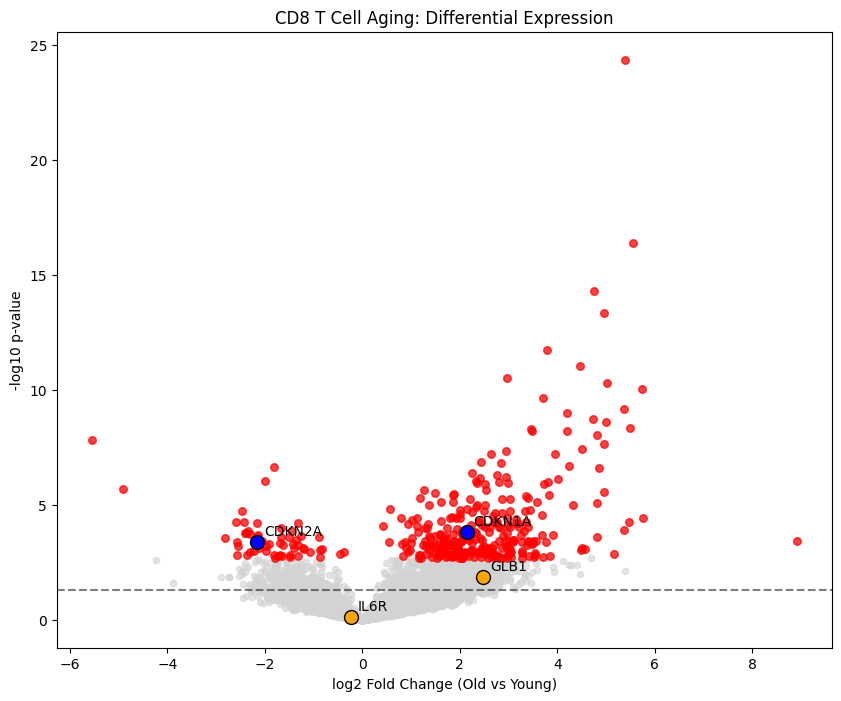

In [20]:
# Create volcano plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sig_genes = de_results_cd8['padj'] < 0.05

# All genes
plt.scatter(de_results_cd8['log2fc'], -np.log10(de_results_cd8['pvalue']), 
           c='lightgray', alpha=0.6, s=20)

# Significant genes
if sum(sig_genes) > 0:
    sig_data = de_results_cd8[sig_genes]
    plt.scatter(sig_data['log2fc'], -np.log10(sig_data['pvalue']), 
               c='red', alpha=0.7, s=30)

# Senescence genes
for _, row in senescence_results.iterrows():
    color = 'blue' if row['padj'] < 0.05 else 'orange'
    plt.scatter(row['log2fc'], -np.log10(row['pvalue']), 
               c=color, s=100, edgecolor='black')
    plt.annotate(row['gene'], (row['log2fc'], -np.log10(row['pvalue'])), 
                xytext=(5, 5), textcoords='offset points')

plt.axhline(-np.log10(0.05), color='black', linestyle='--', alpha=0.5)
plt.xlabel('log2 Fold Change (Old vs Young)')
plt.ylabel('-log10 p-value')
plt.title('CD8 T Cell Aging: Differential Expression')
plt.show()

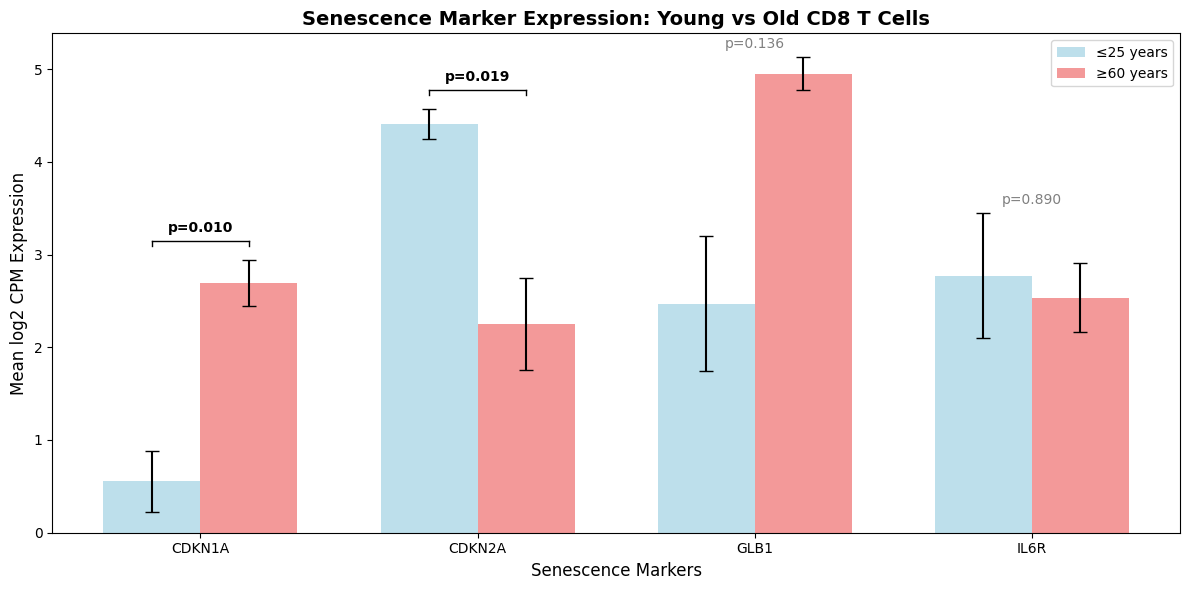

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Get data
genes = senescence_results['gene'].values
log2fc = senescence_results['log2fc'].values
padj = senescence_results['padj'].values

# Get sample groups
young_samples = pseudobulk_log_cpm.columns[sample_metadata_cd8.set_index('sample').loc[pseudobulk_log_cpm.columns, 'age_comparison'] == '≤25 years']
old_samples = pseudobulk_log_cpm.columns[sample_metadata_cd8.set_index('sample').loc[pseudobulk_log_cpm.columns, 'age_comparison'] == '≥60 years']

# Calculate means and standard errors
young_means = []
old_means = []
young_sems = []
old_sems = []

for gene in genes:
    young_expr = pseudobulk_log_cpm.loc[gene, young_samples]
    old_expr = pseudobulk_log_cpm.loc[gene, old_samples]
    
    young_means.append(young_expr.mean())
    old_means.append(old_expr.mean())
    young_sems.append(young_expr.std() / np.sqrt(len(young_expr)))
    old_sems.append(old_expr.std() / np.sqrt(len(old_expr)))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Create grouped bar plot
x = np.arange(len(genes))
width = 0.35

bars1 = ax.bar(x - width/2, young_means, width, yerr=young_sems, 
               label='≤25 years', color='lightblue', alpha=0.8, capsize=5)
bars2 = ax.bar(x + width/2, old_means, width, yerr=old_sems,
               label='≥60 years', color='lightcoral', alpha=0.8, capsize=5)

# Add p-values above bars
for i, p in enumerate(padj):
    # Find the highest point (bar + error bar)
    y_max = max(old_means[i] + old_sems[i], young_means[i] + young_sems[i])
    
    if p < 0.05:
        # Draw significance bracket for significant results
        bracket_height = y_max + 0.2
        ax.plot([i-width/2, i+width/2], [bracket_height, bracket_height], 'k-', linewidth=1)
        ax.plot([i-width/2, i-width/2], [bracket_height-0.05, bracket_height], 'k-', linewidth=1)
        ax.plot([i+width/2, i+width/2], [bracket_height-0.05, bracket_height], 'k-', linewidth=1)
        
        # Add p-value text
        if p < 0.001:
            p_text = f'p<0.001'
        elif p < 0.01:
            p_text = f'p={p:.3f}'
        else:
            p_text = f'p={p:.3f}'
            
        ax.text(i, bracket_height + 0.1, p_text, ha='center', fontsize=10, fontweight='bold')
    else:
        # For non-significant results, just show p-value above the higher bar
        text_height = y_max + 0.1
        p_text = f'p={p:.3f}'
        ax.text(i, text_height, p_text, ha='center', fontsize=10, color='gray')

ax.set_ylabel('Mean log2 CPM Expression', fontsize=12)
ax.set_xlabel('Senescence Markers', fontsize=12)
ax.set_title('Senescence Marker Expression: Young vs Old CD8 T Cells', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(genes)
ax.legend()

plt.tight_layout()
plt.show()

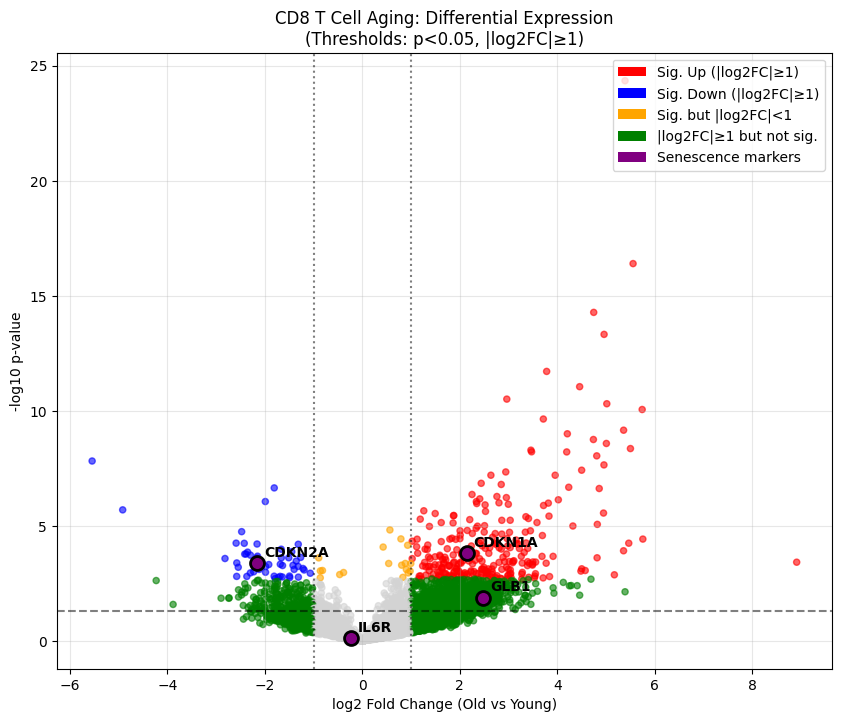

Genes with padj<0.05 AND |log2FC|≥1.0: 330


In [23]:
# Add fold change thresholds to your volcano plot
import matplotlib.pyplot as plt
import numpy as np

# Create volcano plot with thresholds
plt.figure(figsize=(10, 8))

# Plot all genes
sig_genes = de_results_cd8['padj'] < 0.05
fc_threshold = 1.0  # log2FC threshold (2-fold change)

# Color genes by significance AND fold change
colors = []
for _, row in de_results_cd8.iterrows():
    if row['padj'] < 0.05 and abs(row['log2fc']) >= fc_threshold:
        if row['log2fc'] > 0:
            colors.append('red')      # Significant upregulation
        else:
            colors.append('blue')     # Significant downregulation
    elif row['padj'] < 0.05:
        colors.append('orange')       # Significant but small fold change
    elif abs(row['log2fc']) >= fc_threshold:
        colors.append('green')        # Large fold change but not significant
    else:
        colors.append('lightgray')    # Neither significant nor large fold change

plt.scatter(de_results_cd8['log2fc'], -np.log10(de_results_cd8['pvalue']), 
           c=colors, alpha=0.6, s=20)

# Add threshold lines
plt.axhline(-np.log10(0.05), color='black', linestyle='--', alpha=0.5, label='p=0.05')
plt.axvline(fc_threshold, color='black', linestyle=':', alpha=0.5, label=f'log2FC=±{fc_threshold}')
plt.axvline(-fc_threshold, color='black', linestyle=':', alpha=0.5)

# Highlight senescence genes
for _, row in senescence_results.iterrows():
    plt.scatter(row['log2fc'], -np.log10(row['pvalue']), 
               c='purple', s=100, edgecolor='black', linewidth=2, zorder=5)
    plt.annotate(row['gene'], (row['log2fc'], -np.log10(row['pvalue'])), 
                xytext=(5, 5), textcoords='offset points', fontweight='bold')

plt.xlabel('log2 Fold Change (Old vs Young)')
plt.ylabel('-log10 p-value')
plt.title('CD8 T Cell Aging: Differential Expression\n(Thresholds: p<0.05, |log2FC|≥1)')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='red', label='Sig. Up (|log2FC|≥1)'),
    Patch(facecolor='blue', label='Sig. Down (|log2FC|≥1)'),
    Patch(facecolor='orange', label='Sig. but |log2FC|<1'),
    Patch(facecolor='green', label='|log2FC|≥1 but not sig.'),
    Patch(facecolor='purple', label='Senescence markers')
]
plt.legend(handles=legend_elements, loc='upper right')

plt.grid(True, alpha=0.3)
plt.show()

# Count genes in each category
sig_and_fc = sum((de_results_cd8['padj'] < 0.05) & (abs(de_results_cd8['log2fc']) >= fc_threshold))
print(f"Genes with padj<0.05 AND |log2FC|≥{fc_threshold}: {sig_and_fc}")